<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/%D0%A2%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D0%B8_%D0%BF%D0%B5%D1%80%D0%B5%D0%B4%D0%B0%D1%87%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_7_28_03_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# БКБО-01/02-16, Технология обработки и передачи данных
**Лекция** 28 Марта 2020

**Тема** *Перенос спектра на несущую частоту. Преобразование Гильберта. Аналитический сигнал*.

**Цель**: Освоение эффективных методов переноса спектра сигнала в цифровом домене.

**Постоянная ссылка [Google Colab]:**  https://colab.research.google.com/drive/1YAR0O3qrN6eejlIsK2FZhaGyK4Hmqayx

Спектр в базовой полосе частот после обработки формирующим RC фильтром выглядит следующим образом:

![text](https://raw.githubusercontent.com/RF-Lab/images/master/topd_baseband_spectrum.png)

Предположим, требуется передать сигнал с таким спектром через звуковой канал, так, чтобы весь спектр сигнала укладывался в интервал $\omega_1\ldots \omega_2$, где $\omega_1>0$. Тогда спектр должен выглядеть так:

![Сдвинутый спектр](https://raw.githubusercontent.com/RF-Lab/images/master/topd_shifted_baseband_spectrum.png)

Рассмотрим сигнал в базовой полосе на одной частоте $\omega_k$. Этот сигнал можно представить в виде $Ae^{j\omega_kn}$, где $A=\alpha e^{j\phi}$-комплексная амплитуда сигнала, которая содержит информационную часть сигнала. Для того чтобы перенести этот сигнал на частоту $\omega_k+\omega_0$ достаточно умножить каждый отсчет сигнала в базовой полосе на $e^{j\omega_0 n}$

$
Ae^{j\omega_kn}e^{j\omega_0 n}=Ae^{j\left(\omega_k+\omega_0\right)n}
$

![Сдвинутый спектр](https://raw.githubusercontent.com/RF-Lab/images/master/topd_particular_freq_shift.png)

Обобщая на весь сигнал $x_n$ в базовой полосе, получаем окончательную формулу для переноса спектра из базовой полосы на несущую частоту $\omega_0$:

$
s_n = x_n e^{j\omega_0 n}
$

Полученный сигнал с информационной точки зрения идентичен исходному сигналу в базовой полосе частот. Т.е. перенос на несущую частоту *не изменяет информационное наполнение сигнала*. В то же время использовать сигнал $s_n$ для формирования аналогового сигнала (в данном примере звукового сигнала) не представляется возможным, так как сигнал $s_n$ - это комплексный сигнал (т.е. отсчеты этого сигнала являются комплексными числами).

Рассмотрим, что произойдет с сигналом $s_n$ если отбросить его мнимую часть. С этой целью вновь рассмотрим комплекснозначный сигнал на произвольной частоте $\omega_k$. 

$
\Re\left[\alpha e^{j\omega_k n+\phi}\right] = \Re \left[\alpha \cos(\omega_k n+\phi)+j \alpha\sin(\omega_k n+\phi)\right] = \alpha \cos(\omega_k n+\phi)
$

Действительный сигнал  $\alpha \cos(\omega_k n)$ можно представить в виде суммы двух комплекснозначных последовательностей:

$
\cos(\omega_k n) = \frac{1}{2}e^{j\omega_k n} + \frac{1}{2}e^{-j\omega_k n} = \frac{1}{2}e^{j\omega_k n} + (\frac{1}{2}e^{j\omega_k n})^*
$

Таким образом, если сигнал имеет компактный спектр расположенный в правой полуплоскости, то отбрасывание его мнимой части во времени соответствует формированию зеркально отраженной части спектра в области отрицательных частот.

![Сдвинутый спектр](https://raw.githubusercontent.com/RF-Lab/images/master/topd_real_vs_complex_spectrum.png)

В этом случае сигнал $s_n$ называют **аналитическим сигналом** для сигнала $\Re[s_n]$. С информационной точки зрения сигналы $s_n$ и $\Re[s_n]$ идентичны. 

Аналитический сигнал перед формированием аналогового сигнала следует преобразовать в $\Re[s_n]$ путем отбрсывания мнимой части. 

Представление в виде аналтического сигнала позволяет упростить некоторые важные преобразования. Так, например, перенос спектра последовательности в форме аналитического сигнала представляется в виде умножения всех отсчетов на $e^{j\omega_0}$, для сигнала $\Re[s_n]$ умножение на $e^{j\omega_0}$ для переноса спектра применять нельзя. (объясните почему).

Для получения аналитического сигнала по действительному сигналу $\Re[s_n]$ в частотной области достаточно обнулить значения спектра соответсвующие всем отрицательным частотам, далее, для сохранения энергии, следует умножить все значения в спектре соответсвующие положительным частотам, значение в спектре, соответствующее нулевой частоте следует оставить неизменным.

Для получения аналитического сигнала по действительному сигналу $\Re[s_n]$ во временной области можно воспользоваться следующим представлением:

$
s_n = \Re[s_n] + j H(\Re[s_n])
$

Здесь $H()$ - **преобразование Гильберта**.
Преобразование $H(x_n)$ формирует ортогональное дополнение к последовательности x_n таким образом, что 

$
\sum_{n=-\infty}^{\infty}x_nH(x_n) = 0
$

**Задание**

* Сформировать последовательность из $N$ символов 16QAM.
* Повысить частоту дискретизации в 8 раз путем вставки нулей.
* Применить формирующий RRC фильтр с параметром $\beta=0.2$.
* Построить СПМ полученного сигнала.
* Предполагая, что ширина базовой полосы составляет $4000$Гц, перенести спектр сигнала на несущую частоту $\omega_0=3000$Гц.
* Построить СПМ полученного сигнала.
* Отбросить мнимую часть полученного сигнала.
* Построить СПМ сигнала без мнимой части.
* Воспроизвести полученный сигнал с помощью звуковой карты.
* Добавить к действительному сигналу белый гауссов шум в соотношении сигнал/шум 20dB.
* Построить СПМ полученной смеси.
* Применить RRC фильтр к полученной смеси.
* Понизить частоту дискретизации полученного сигнала до 1SPS путем прореживания.
* отобразить принятые символы на комплексной плоскости.





In [0]:
# Установка библиотеки CommPy - см. https://github.com/veeresht/CommPy
pip install scikit-commpy

Text(0.5, 1.0, 'Спектральная плотность')

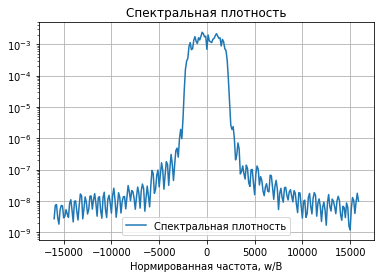

In [5]:
import  matplotlib.pyplot as plt
import  numpy as np
from    scipy import signal
import  numpy.matlib
from commpy.filters import rrcosfilter

N         = 1000
# make N 16QAM symbols 
x_re      = (np.random.randint(3, size=(N,), dtype='I') * 2) - 3*np.ones((N,))
x_im      = (np.random.randint(3, size=(N,), dtype='I') * 2) - 3*np.ones((N,))
x         = np.vectorize(complex)(x_re,x_im)

# upsample to 8 SPS
y         = np.vstack((x.transpose(),np.zeros((7,N))))
y         = y.flatten()

# apply RRC
M               = 64    # filter's length
beta            = 0.2   # Roll-off factor
Ts              = 1     # Baud period
Fs              = 8     # Sampling frequency
time_idx,h      = rrcosfilter(M, beta, Ts, Fs)
y_rc            = np.convolve(h,y)

frex,Pxx  = signal.welch( y_rc,return_onesided=False,nperseg=256, noverlap=210,fs=8*4000)
plt.semilogy( np.fft.fftshift(frex),np.fft.fftshift(Pxx) )
#plt.ylim([0.5e-3, 100])
plt.grid('true')
plt.legend(['Спектральная плотность'])
plt.xlabel('Нормированная частота, w/B')
plt.title('Спектральная плотность')

#y_omega_0       = y_rc * ...
